In [1]:
import numpy as np
import requests
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data_income = pd.read_csv("../data/data_income.csv")
data_pastry = pd.read_csv("../data/data_pastry.csv")

In [3]:
data_pastry

,date,croissant,tartelette,boisson_33cl
0,2021-01-02,66.0,0.0,0.0
1,2021-01-03,59.0,0.0,0.0
2,2021-01-04,17.0,0.0,1.0
3,2021-01-05,12.0,0.0,3.0
4,2021-01-06,13.5,0.0,2.0
...,...,...,...,...
532,2022-06-18,75.0,10.0,3.0
533,2022-06-19,114.0,25.0,3.0
534,2022-06-20,38.0,5.0,7.0
535,2022-06-21,36.0,4.0,4.0


In [7]:
"""
Моделі роблять прогноз на 14 днів вперед на основі даних за минулі 28 днів.
"""

data_to_predict = data_income.iloc[410:438]

response_prediction = requests.post('http://localhost:5000/predict-income', json={"dataframe": data_to_predict.to_json(orient='split')})
y_pred = response_prediction.json().get("prediction")

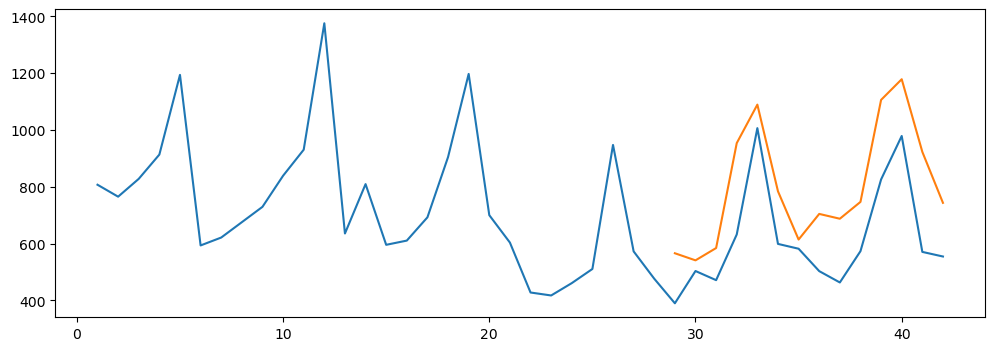

In [9]:
plt.figure(figsize = (12, 4))
plt.plot(np.arange(1, 43), data_income.iloc[410:438+14]["income"])
plt.plot(np.arange(29, 43), y_pred)
plt.show()

In [11]:
data_to_predict = data_pastry.iloc[410:438]

response_prediction = requests.post('http://localhost:5000/predict-pastry', json={"dataframe": data_to_predict.to_json(orient='split')})
y_pred = np.array(response_prediction.json().get("prediction"))

In [13]:
y_pred

array([[20.85610977,  6.24894238,  2.07640095],
       [19.43983454,  5.86080348,  2.50660592],
       [14.99227342,  2.91274834,  2.865192  ],
       [50.8962183 ,  7.72013688,  1.01816107],
       [86.59471416, 17.93397713,  0.49121986],
       [39.45093137,  8.55904114,  2.7269178 ],
       [19.75384831,  3.43366215,  3.9444409 ],
       [28.35930949,  7.04194319,  2.41320334],
       [18.99744296,  6.09271383,  2.73812927],
       [17.1204913 ,  3.72608811,  2.93146718],
       [61.87357032,  9.92045605,  1.73524159],
       [91.18507338, 19.59008884,  0.34971737],
       [43.38075256,  7.88862282,  3.54645643],
       [25.03245437,  3.50788578,  4.30939597]])

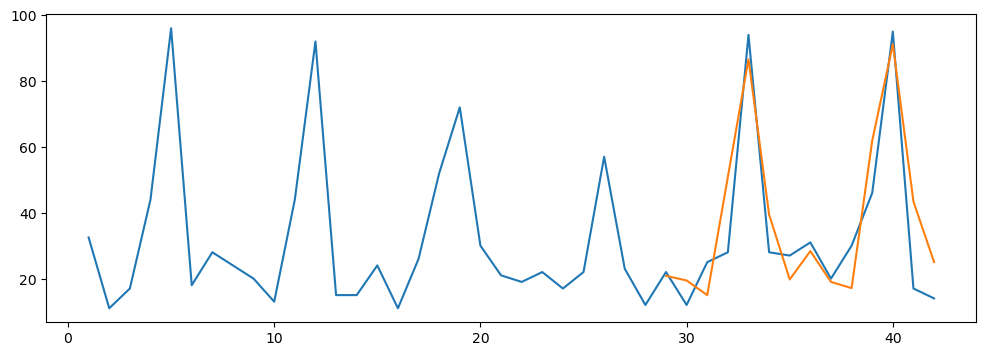

In [15]:
plt.figure(figsize = (12, 4))
plt.plot(np.arange(1, 43), data_pastry.iloc[410:438+14]["croissant"])
plt.plot(np.arange(29, 43), y_pred[:, 0])
plt.show()

In [23]:
import psycopg2
try:
    conn = psycopg2.connect(
        host="localhost",
        port=5432,
        database="bakery_data",
        user="bakery_admin",
        password="bakery_admin"
    )
    print("Connection successful!")
except Exception as e:
    print(f"Error connecting to database: {e}")

Connection successful!


In [25]:
# Function to get column names of a specified table
def get_column_names(table_name):
    try:
        query = f"SELECT column_name FROM information_schema.columns WHERE table_name = '{table_name}';"
        with conn.cursor() as cursor:
            cursor.execute(query)
            columns = cursor.fetchall()
        # Extract column names from the result
        column_names = [col[0] for col in columns]
        return column_names
    except Exception as e:
        print(f"Error fetching column names: {e}")
        return []

# Function to display the entire table as a pandas DataFrame
def display_table(table_name):
    try:
        query = f"SELECT * FROM {table_name};"
        df = pd.read_sql_query(query, conn)
        return df
    except Exception as e:
        print(f"Error fetching table data: {e}")
        return pd.DataFrame()

# Example usage:
table_name = "bakery_sales"

# Get column names
column_names = get_column_names(table_name)
print(f"Column names in '{table_name}': {column_names}")

df = display_table(table_name)
print(f"Data in '{table_name}':\n", df)

Column names in 'bakery_sales': ['id', 'date', 'income', 'croissant', 'tartelette', 'boisson_33cl']
Data in 'bakery_sales':
       id        date   income  croissant  tartelette  boisson_33cl
0      1  2021-01-02   987.85         66           0             0
1      2  2021-01-03  1014.30         59           0             0
2      3  2021-01-04   461.90         17           0             1
3      4  2021-01-05   515.70         12           0             3
4      5  2021-01-06   529.85         14           0             2
..   ...         ...      ...        ...         ...           ...
532  533  2022-06-18  1027.05         75          10             3
533  534  2022-06-19  1523.00        114          25             3
534  535  2022-06-20   690.80         38           5             7
535  536  2022-06-21   616.80         36           4             4
536  537  2022-06-22   517.50         30           8             3

[537 rows x 6 columns]


C:\Users\Artem\AppData\Local\Temp\ipykernel_400\2017040337.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [27]:
df

,id,date,income,croissant,tartelette,boisson_33cl
0,1,2021-01-02,987.85,66,0,0
1,2,2021-01-03,1014.30,59,0,0
2,3,2021-01-04,461.90,17,0,1
3,4,2021-01-05,515.70,12,0,3
4,5,2021-01-06,529.85,14,0,2
...,...,...,...,...,...,...
532,533,2022-06-18,1027.05,75,10,3
533,534,2022-06-19,1523.00,114,25,3
534,535,2022-06-20,690.80,38,5,7
535,536,2022-06-21,616.80,36,4,4
